# Protein Folding

### Introduction

The goal of this work is to determine the minimum energy configuration of a protein. Starting from a random configuration, the protein's structure is optimized to lower the energy. This can be achieved by encoding the protein folding problem into a qubit operator and ensuring that all physical constrains are satisfied. 

For the problem encoding we use: 

- Configuration qubits: qubits that are used to describe the configurations and the relative position of the different beads
- Interaction qubits: qubits that encode interacations between the different aminoacids

For our case we use a tetrahydral lattice (diamond shape lattice) where we encode the movement through the configuration qubits. 

The Hamiltonian of the system for a set of qubits $\mathbf{q}=\{\mathbf{q}_{cf}, \mathbf{q}_{in}\}$ is 

$$H(\mathbf{q}) = H_{gc}(\mathbf{q}_{cf}) + H_{ch}(\mathbf{q}_{cf}) + H_{in}(\mathbf{q}) $$

where 
- $H_{gc}$ is the geometrical constrain term (governing the growth of the primary sequence of aminoacids without bifurcations
- $H_{ch}$ is the chirality constrain (enforcing the righ stereochemistry for the system)
- $H_{in}$ is the interaction energy terms of the system. In our case we consider only nearest neighbor interactions. 

Further details about the used model and the encoding of the problem can be found in [1].

<font size='2'>[1] A.Robert, P.Barkoutsos, S.Woerner and I.Tavernelli, Resource-efficient quantum algorithm for protein folding, npj Quantum Information, 2021 </font>

In [1]:
from qiskit_nature.problems.sampling.protein_folding.interactions.random_interaction import RandomInteraction 
from qiskit_nature.problems.sampling.protein_folding.interactions.miyazawa_jernigan_interaction import MiyazawaJerniganInteraction 
from qiskit_nature.problems.sampling.protein_folding.peptide.peptide import Peptide
from qiskit_nature.problems.sampling.protein_folding.protein_folding_problem import ProteinFoldingProblem

from qiskit_nature.problems.sampling.protein_folding.penalty_parameters import PenaltyParameters

PATH = "problems/sampling/protein_folding/resources/test_protein_folding_problem"


### Protein Main Chain

The Protein consists of a main chain that is a linear chain of aminoacids. For the naming of different residues we use the one-letter code as defined in Reference [2]. Further details about the naming and the type of aminoacids can also be found in [3].

For this particular case we demonstrate the generation of the qubit operator in a neuropeptide with the main chain consisting of 7 aminoacids with letter codes APRLFY (see also [1]).

<font size="2">[2] IUPAC–IUB Commission on Biochemical Nomenclature (1972). "A one-letter notation for amino acid sequences". Pure and Applied Chemistry. 31 (4): 641–645. doi:10.1351/pac197231040639. PMID 5080161.</font> <br>
<font size="2">[3] https://en.wikipedia.org/wiki/Amino_acid</font>

In [2]:
main_chain_len = 7
main_chain_residue_seq = ["A", "P", "R", "L", "R", "F", "Y"]

### Side Chains

Beyond the main chain of the protein there may be aminoacids attached to the residues of the main chain. Our model allows for side chains of the maximum length of one. Enlongated side chains would require the introduction of additional penalty terms that are still under development. 

For the definition of the side chain we provide a binary vector specifying the existence of a side chain and if a side chain is present we indicate the letter type of the residue.

In [3]:
side_chain_lens = [0, 0, 0, 0, 0, 0, 0]
side_chain_residue_sequences = [None]*7

### Interaction between Aminoacids

For the description of inter-residue contacts for proteins we use knowledge-based (statistical) potentials derived using quasi-chemical approximation. The potentials used here are introduced by Miyazawa, S. and Jernigan, R. L. in [4]. 

Beyond this model we also allow for random contact maps (interactions) that provide a random interaction map. One can also introduce a custom interaction map that enhances certain configurations of the protein (e.g. alpha helix, beta sheet etc). 

<font size="2"> [4] J. Mol. Biol.256, 623–644 (1996), Table 3. </font>

In [4]:
random_interaction = RandomInteraction()
mj_interaction = MiyazawaJerniganInteraction()

In [5]:
## @ Darius can we make here a contact map plot? like a heat map 

### Physical Constrains

To ensure that all physical constrains are respected we introduce penalty functions. The different penalty terms used are: 
- penalty_chiral: A penalty parameter used to impose the right chirality.
- penalty_back: A penalty parameter used to penalize turns along the same axis.
- penalty_1: A penalty parameter used to penalize local overlap between beads within a nearest neighbor contact.

In [6]:
lambda_back = 10
lambda_chiral = 10
lambda_1 = 10

penalty_terms = PenaltyParameters(lambda_chiral, lambda_back, lambda_1)

### Peptide Definition


Based on the main chain and possible side chains we define the peptide object that includes all the structural information of the modeled system.

In [7]:
peptide = Peptide(main_chain_len, main_chain_residue_seq, side_chain_lens, side_chain_residue_sequences)

### Protein Folding Problem 

Based on the defined peptide, the interaction (contact map) and the penalty terms we defined for our model we define the protein folding problem that returns qubit operators.


In [8]:
protein_folding_problem = ProteinFoldingProblem(peptide, random_interaction, penalty_terms)
qubit_op = protein_folding_problem.qubit_op()

In [9]:
print(qubit_op)

1628.7627905057327 * IIIIIIIII
- 711.84887518386 * ZIIIIIIII
- 914.4139153218729 * IZIIIIIII
+ 5.0 * ZZIIIIIII
+ 192.5 * IIZIIIIII
- 200.0 * ZIZIIIIII
+ 7.5 * IZZIIIIII
+ 105.0 * IIIZIIIII
- 105.0 * ZIIZIIIII
+ 95.0 * IIZZIIIII
- 100.0 * ZIZZIIIII
+ 5.0 * IZZZIIIII
- 497.5 * IIIIZIIII
+ 195.0 * ZIIIZIIII
+ 302.5 * IZIIZIIII
- 95.0 * IIZIZIIII
+ 100.0 * ZIZIZIIII
- 2.5 * IZZIZIIII
- 100.0 * IIIIIZIII
+ 102.5 * ZIIIIZIII
- 2.5 * IZIIIZIII
- 95.0 * IIIZIZIII
+ 100.0 * ZIIZIZIII
- 2.5 * IZIZIZIII
- 300.0 * IIIIZZIII
+ 97.5 * ZIIIZZIII
+ 202.5 * IZIIZZIII
- 95.0 * IIZZZZIII
+ 100.0 * ZIZZZZIII
- 2.5 * IZZZZZIII
+ 487.5 * IIIIIIZII
- 195.0 * ZIIIIIZII
- 295.0 * IZIIIIZII
+ 97.5 * IIZIIIZII
- 100.0 * ZIZIIIZII
+ 2.5 * IZZIIIZII
- 195.0 * IIIIZIZII
+ 97.5 * ZIIIZIZII
+ 100.0 * IZIIZIZII
+ 100.0 * IIIIIIIZI
- 102.5 * ZIIIIIIZI
+ 2.5 * IZIIIIIZI
+ 97.5 * IIIZIIIZI
- 100.0 * ZIIZIIIZI
+ 2.5 * IZIZIIIZI
- 195.0 * IIIIIZIZI
+ 97.5 * ZIIIIZIZI
+ 100.0 * IZIIIZIZI
+ 295.0 * IIIIIIZZI
- 97.5 * ZIIIIIZ

### Using VQE with CVAR expecation value for the solution of the problem

We can use the VQE with CVAR expectation value for the solution of the problem and for finding the minimum configuration energy. 

In [10]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.opflow import PauliExpectation, CVaRExpectation
from qiskit import execute, Aer

# set classical optimizer
maxiter = 100
optimizer = COBYLA(maxiter=maxiter)

# set variational ansatz
ansatz = RealAmplitudes(7, reps=1)

# set backend
backend_name = 'qasm_simulator'  # use this for QASM simulator
# backend_name = 'aer_simulator_statevector'  # use this for statevector simlator
backend = Aer.get_backend(backend_name)  

# run variational optimization for different values of alpha
alphas = [0.15]  # confidence levels to be evaluated

counts = []
values = []
    
def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

# initialize CVaR_alpha objective
cvar_exp = CVaRExpectation(alphas[0], PauliExpectation())

# initialize VQE using CVaR
vqe = VQE(expectation=cvar_exp, optimizer=optimizer, ansatz=ansatz, quantum_instance=backend,
          callback=store_intermediate_result)

eigenvalue = vqe.compute_minimum_eigenvalue(qubit_op)
# print results
print(eigenvalue)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 100,
    'eigenstate': {   '000000000': 0.03125,
                      '000000011': 0.04419417382415922,
                      '000000100': 0.05412658773652741,
                      '000001001': 0.03125,
                      '000001100': 0.05412658773652741,
                      '000001111': 0.05412658773652741,
                      '000010000': 0.08838834764831845,
                      '000010001': 0.04419417382415922,
                      '000010011': 0.03125,
                      '000010100': 0.17399263633843817,
                      '000010101': 0.04419417382415922,
                      '000010110': 0.08838834764831845,
                      '000010111': 0.08267972847076846,
                      '000011000': 0.07654655446197431,
                      '000011010': 0.03125,
                      '000011100': 0.16237976320958225,
                      '000011110': 0.06987712429686843,
                      '000

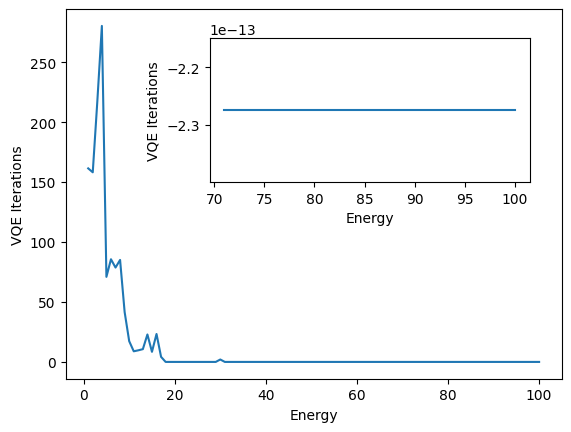

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts,values)
plt.xlabel('Energy')
plt.ylabel('VQE Iterations')

fig.add_axes([0.35,0.52,0.5,0.3])

plt.plot(counts[70:],values[70:])
plt.xlabel('Energy')
plt.ylabel('VQE Iterations')
plt.show()